<a href="https://colab.research.google.com/github/prachigupta2006/feature-engineering/blob/main/feature_engineering_(normalization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [15]:
df= pd.read_csv('Social_Network_Ads.csv')


In [16]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [17]:
df1=df.drop(['User ID'],axis=1)
df2=df1.drop(['Gender'],axis=1)
df2

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<Axes: xlabel='Age', ylabel='Density'>

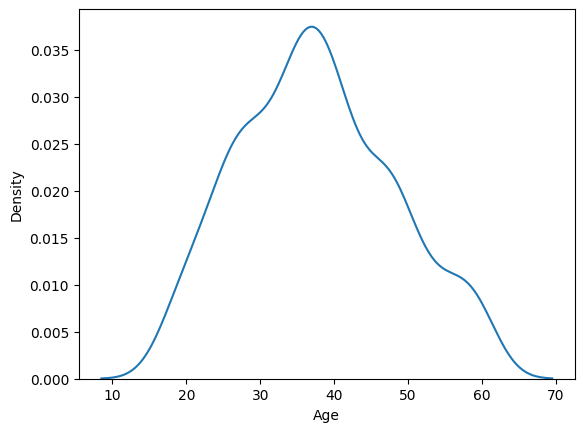

In [21]:
sns.kdeplot(df2['Age'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

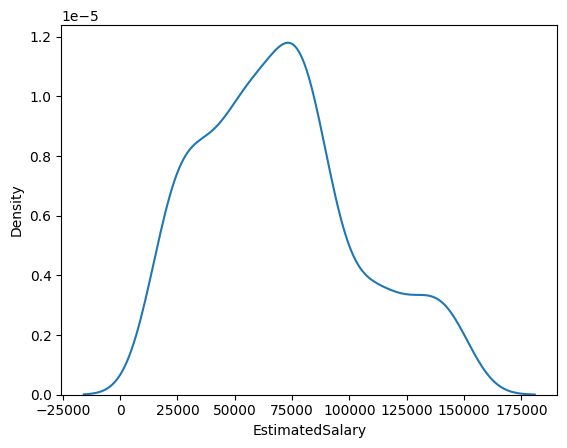

In [25]:
sns.kdeplot(df2['EstimatedSalary'])

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

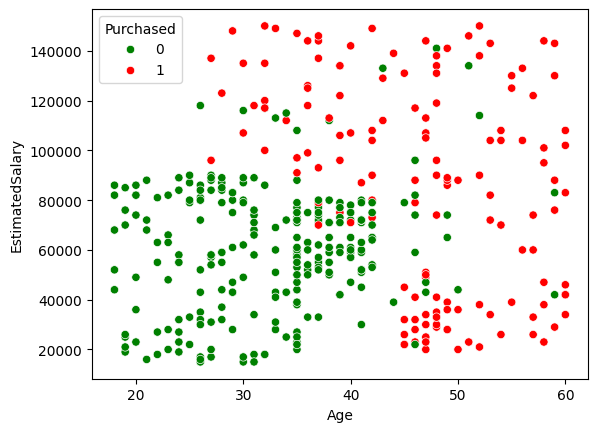

In [30]:
color_dict={1:'red',0:'green'}
sns.scatterplot(x='Age',y='EstimatedSalary',data=df2,hue='Purchased',palette=color_dict)

TRAIN TEST SPLIT

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df2.drop('Purchased',axis=1),df2['Purchased'],test_size=0.3,random_state=0)

X_train.shape,X_test.shape

((280, 2), (120, 2))

MIN - MAX SCALER

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

In [33]:
X_train_sc=pd.DataFrame(X_train_sc,columns=X_train.columns)
X_test_sc=pd.DataFrame(X_test_sc,columns=X_test.columns)

In [37]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [38]:
np.round(X_train_sc.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.7,0.5
max,1.0,1.0


PLOTTING THE GAPHS SO THAT WE SEE THE DIFFRENCE WE BOUGHT IN RANGE

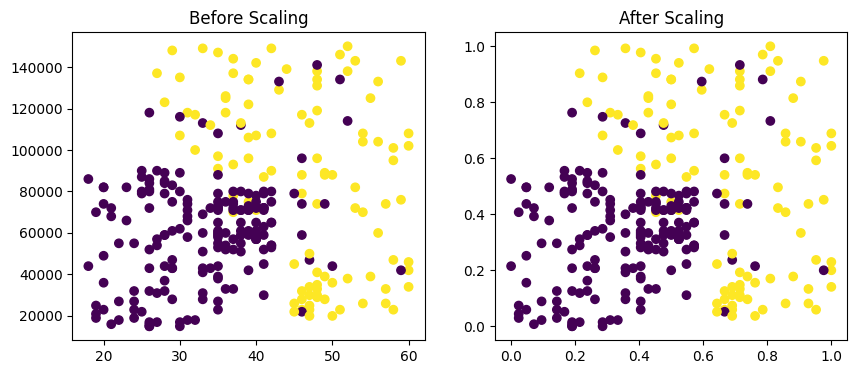

In [42]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_sc['Age'],X_train_sc['EstimatedSalary'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

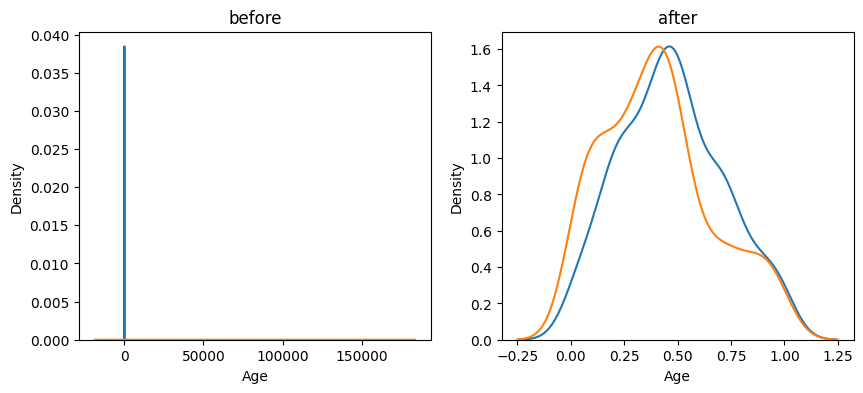

In [44]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))

ax1.set_title("before")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("after")
sns.kdeplot(X_train_sc['Age'],ax=ax2)
sns.kdeplot(X_train_sc['EstimatedSalary'],ax=ax2)
plt.show()